## 1  典型的工作流程

https://keras.io/zh/getting-started/sequential-model-guide/

### （1） 准备数据
### （2）定义模型
定义从输入到输出的各层网络。

有两种方法：
- 第1种： 使用Sequential类，仅用于层的线性堆叠，比较常用 ，直接 model = models.Sequential()
- 第2种： 函数式API，用于层组成的有向无环图，可以构建任意形式的网络

### （3）配置优化器、损失函数和指标
选择损失函数、优化器和要监控的指标

### （4）训练模型

### （5）评估优化

### （6）预测

## 2 示例

### 2.1 准备数据

In [1]:
# 1 准备数据
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 训练集、验证集和测试集, 从训练集种取出10000个样本作为验证集
x_train = train_images[:50000]
y_train = train_labels[:50000]

x_validation = train_images[50000:]
y_validation = train_labels[50000:]

x_test = test_images
y_test = test_labels

Using TensorFlow backend.


### 2.2 定义模型

In [2]:
# 2 定义模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### 2.3 配置优化器、损失函数和指标

In [3]:
# 3 配置优化器、损失函数和指标
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### 2.4 训练

In [4]:
# 4 训练
history = model.fit(x_train, 
                    y_train, 
                    epochs=5, 
                    batch_size=128,
                    validation_data=(x_validation, y_validation))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 79us/step - loss: 0.2799 - acc: 0.9202 - val_loss: 0.1773 - val_acc: 0.9466
Epoch 2/5
50000/50000 [==============================] - 4s 79us/step - loss: 0.1163 - acc: 0.9654 - val_loss: 0.1019 - val_acc: 0.9680
Epoch 3/5
50000/50000 [==============================] - 4s 81us/step - loss: 0.0755 - acc: 0.9780 - val_loss: 0.0777 - val_acc: 0.9770
Epoch 4/5
50000/50000 [==============================] - 4s 77us/step - loss: 0.0546 - acc: 0.9837 - val_loss: 0.0913 - val_acc: 0.9728
Epoch 5/5
50000/50000 [==============================] - 4s 78us/step - loss: 0.0401 - acc: 0.9881 - val_loss: 0.0763 - val_acc: 0.9788


### 2.5 模型优化

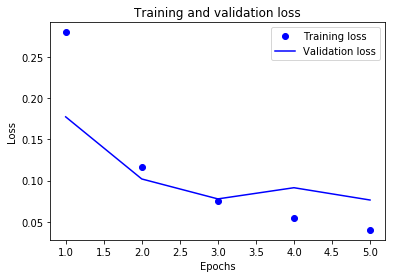

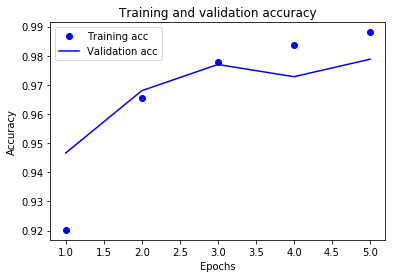

In [5]:
history_dict = history.history

#绘制训练损失和验证损失
import matplotlib.pyplot as plt
%matplotlib inline 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练精度和验证精度
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# 在测试集验证
test_loss, test_acc  = model.evaluate(test_images, test_labels)
print("test loss:",test_loss)
print("test acc:",test_acc)

10000/10000 [==============================] - 1s 53us/step
test loss: 0.0693628858985
test acc: 0.9791


### 2.6 预测

In [7]:
model.predict(x_test)

array([[  3.06604209e-09,   1.97453254e-09,   5.11045073e-06, ...,
          9.99958277e-01,   1.20521435e-07,   9.85504357e-07],
       [  1.93256827e-10,   1.16661004e-05,   9.99988079e-01, ...,
          3.22374175e-16,   1.38669423e-08,   3.13015605e-14],
       [  1.74215927e-07,   9.99556482e-01,   2.07506819e-05, ...,
          3.18640785e-04,   3.98132179e-05,   1.43102977e-06],
       ..., 
       [  4.89149296e-14,   2.36226386e-11,   4.07471669e-12, ...,
          4.36029410e-07,   4.81923728e-08,   4.02127762e-06],
       [  9.54263335e-10,   3.65635924e-11,   2.58659983e-13, ...,
          2.95677163e-11,   9.95369078e-07,   1.49606792e-12],
       [  5.91065391e-11,   1.49390642e-14,   7.47550077e-11, ...,
          2.02020195e-15,   3.22659174e-12,   2.31211019e-13]], dtype=float32)